In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
#from statsmodels.tsa.seasonal import seasonal_decompose


In [220]:
np.random.seed(42)
raw = np.random.standard_normal(400)
df_data = pd.DataFrame({'non_stationary':raw, '0.5': raw * 0.5 } )
df_data.head()

,non_stationary,0.5
0,0.496714,0.248357
1,-0.138264,-0.069132
2,0.647689,0.323844
3,1.523030,0.761515
4,-0.234153,-0.117077


In [ ]:
df_data['non_stationary'][0] = 10
df_data['0.5'] = df_data.shift(1,fill_value=0)['0.5']
df_data['stationary'] = df_data['non_stationary'] + df_data['0.5']
df_data['stationary'][0] = 0
df_data['non_stationary'] = df_data['non_stationary'].cumsum()


<Axes: >

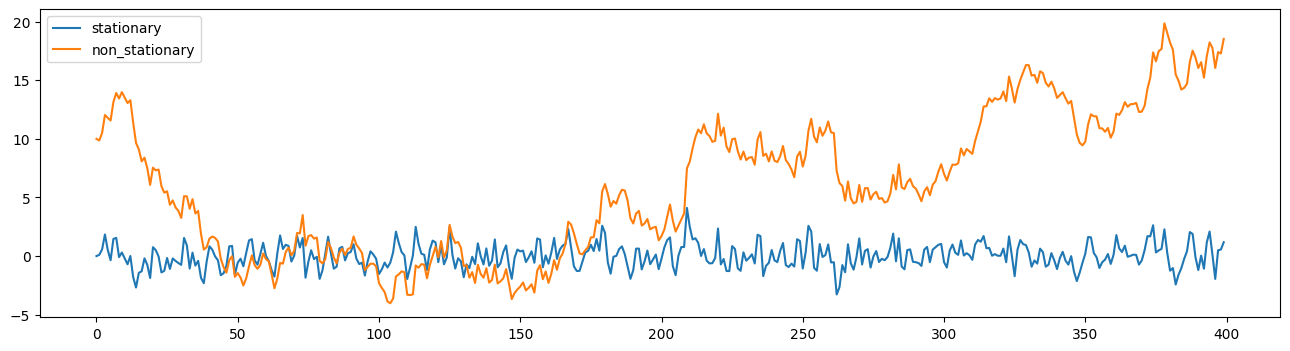

In [222]:
df_data[['stationary','non_stationary']].plot(figsize=(16,4))

<Axes: >

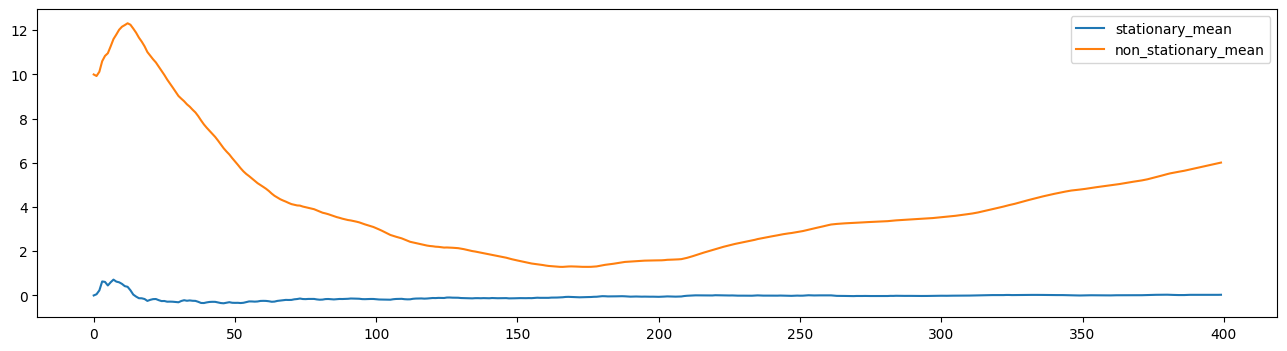

In [223]:
df_data['stationary_mean'] = df_data.stationary.expanding().mean()
df_data['non_stationary_mean'] = df_data.non_stationary.expanding().mean()
df_data[['stationary_mean','non_stationary_mean']].plot(figsize=(16,4))

<Axes: >

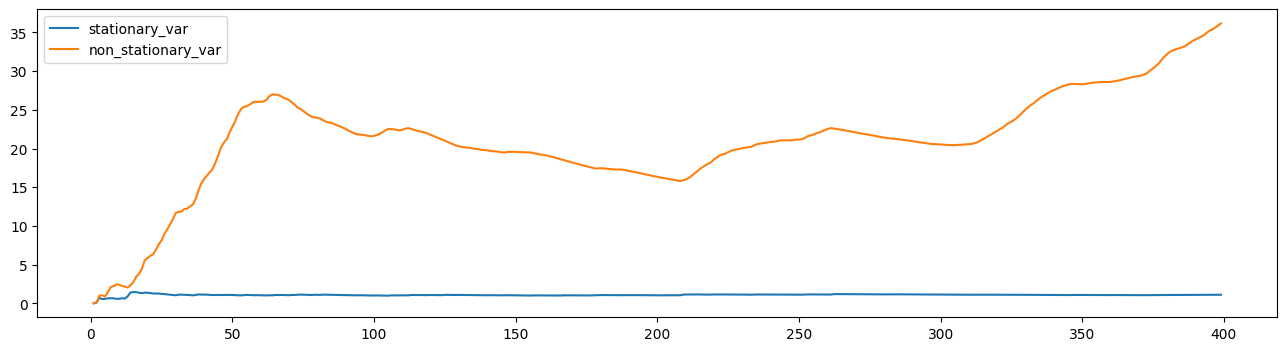

In [224]:
df_data['stationary_var'] = df_data.stationary.expanding().var()
df_data['non_stationary_var'] = df_data.non_stationary.expanding().var()
df_data[['stationary_var','non_stationary_var']].plot(figsize=(16,4))

In [ ]:
np.random.seed(42)
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)

<Axes: >

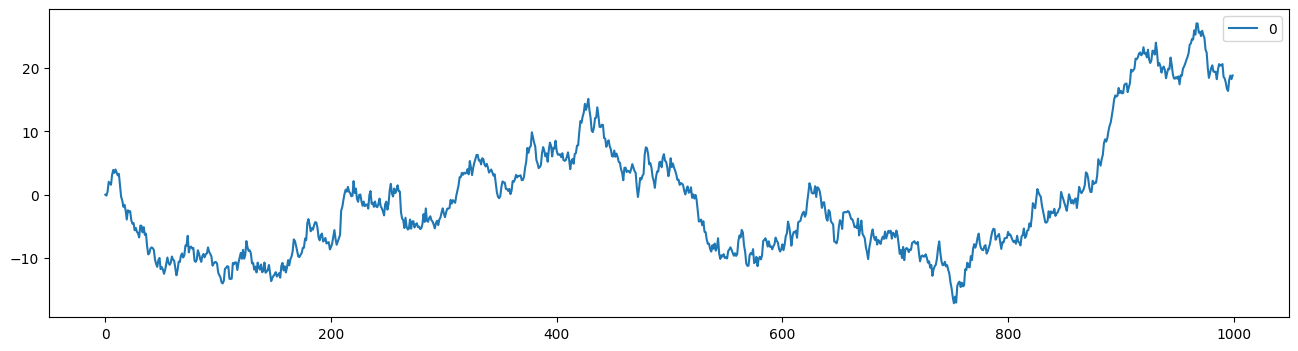

In [243]:
pd.DataFrame(random_walk).plot(figsize=(16,4))

In [69]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.9659524876918759
p-value: 0.7654789696692579


In [70]:
ADF_result

(-0.9659524876918759,
 0.7654789696692579,
 0,
 999,
 {'1%': -3.4369127451400474,
  '5%': -2.864437475834273,
  '10%': -2.568312754566378},
 2735.41783678331)

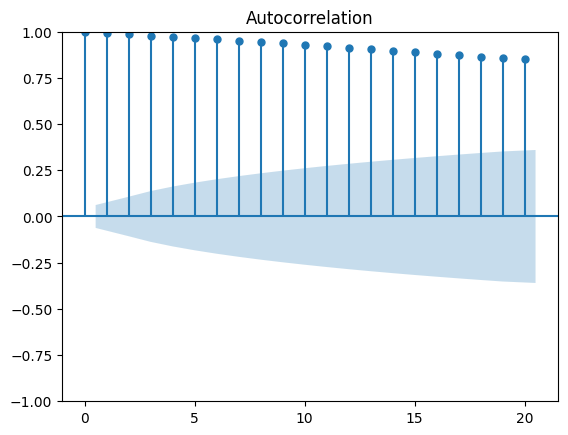

In [258]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(random_walk, lags=20)
plt.show()

In [242]:
diff_random_walk = np.diff(random_walk, n=1)
ADF_result = adfuller(diff_random_walk)
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')
ADF_result

ADF Statistic: -31.7893108575606
p-value: 0.0


(-31.7893108575606,
 0.0,
 0,
 998,
 {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573},
 2732.189035830486)

<Axes: >

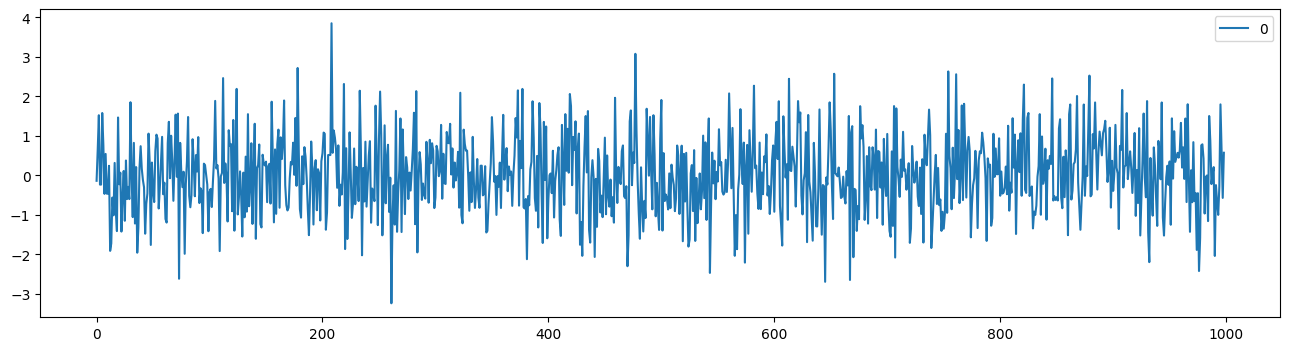

In [93]:
pd.DataFrame(diff_random_walk).plot(figsize=(16,4))

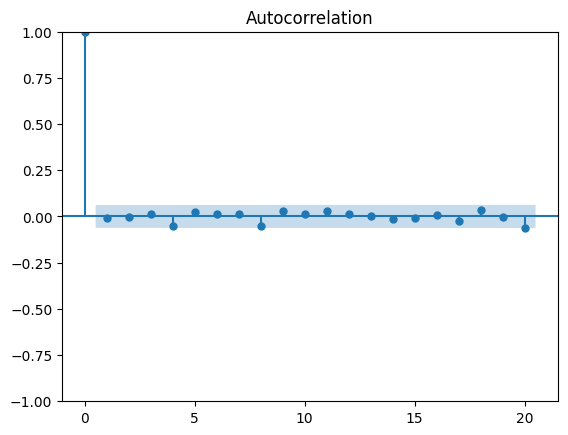

In [257]:
plot_acf(diff_random_walk, lags=20)
plt.show()

In [225]:
df_googl = pd.read_csv('./data/GOOGL.csv', index_col='Date', parse_dates=['Date'])

<Axes: xlabel='Date'>

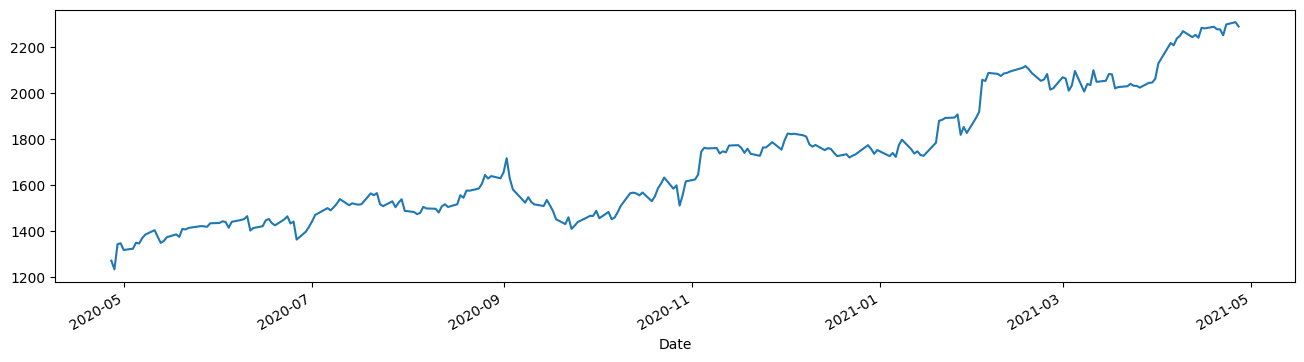

In [226]:
df_googl.Close.plot(figsize=(16,4))

In [240]:
GOOGL_ADF_result = adfuller(df_googl.Close)
print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')
GOOGL_ADF_result

ADF Statistic: 0.1602504866477152
p-value: 0.9699419435913058


(0.1602504866477152,
 0.9699419435913058,
 8,
 244,
 {'1%': -3.457437824930831,
  '5%': -2.873459364726563,
  '10%': -2.573122099570008},
 2292.5903585999613)

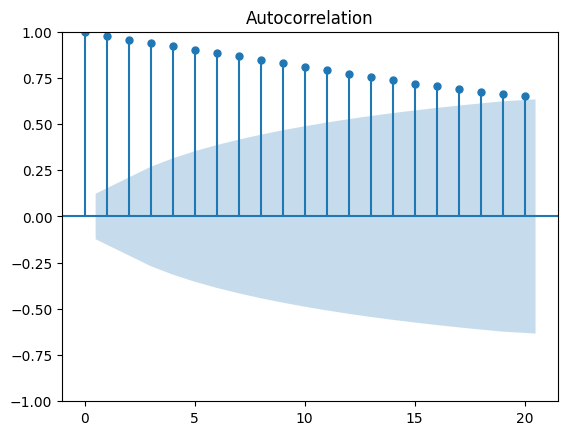

In [249]:
plot_acf(df_googl.Close, lags=20)
plt.show()

In [261]:
diff_close = np.diff(df_googl.Close, n=1)
GOOGL_diff_ADF_result = adfuller(diff_close)
print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')
GOOGL_diff_ADF_result

ADF Statistic: -5.30343970429522
p-value: 5.386530961454919e-06


(-5.30343970429522,
 5.386530961454919e-06,
 7,
 244,
 {'1%': -3.457437824930831,
  '5%': -2.873459364726563,
  '10%': -2.573122099570008},
 2281.5968988816794)

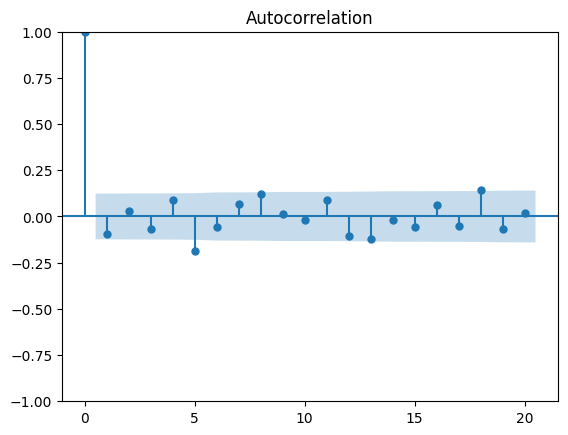

In [269]:
plot_acf(diff_close, lags=20)
plt.show()

In [270]:
df = pd.DataFrame({'value': random_walk})


<Axes: >

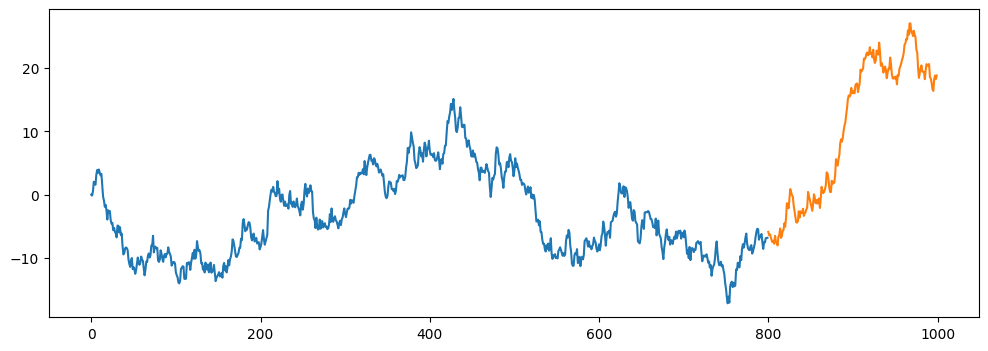

In [273]:
fig = plt.figure(figsize=(12,4))
df[:800].value.plot()
df[800:].value.plot()

In [284]:
test = df[800:]
test.loc[:, ['pred_mean']] = df[:800].value.mean()
test.loc[:, ['pred_last']] = df['value'][799]

drift = df['value'][799] / 799
test.loc[:, ['pred_drift']]   = np.arange(801, 1001, 1) * drift

test.head()

,value,pred_mean,pred_last,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.832006
801,-6.392708,-3.677206,-6.814947,-6.840536
802,-6.296588,-3.677206,-6.814947,-6.849065
803,-6.758863,-3.677206,-6.814947,-6.857594
804,-7.193359,-3.677206,-6.814947,-6.866124


<Axes: >

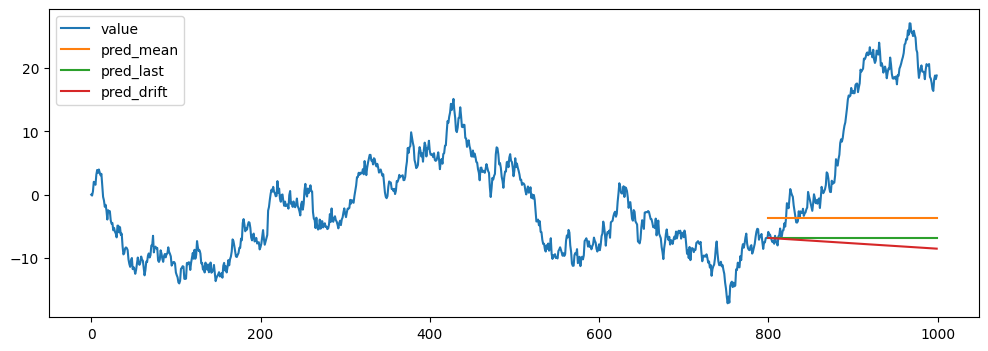

In [298]:
a = pd.concat([df, test[['pred_mean', 'pred_last', 'pred_drift']] ], axis=1)
a.plot(figsize=(12,4))

In [299]:
import torch
from torch import nn
criterion = nn.MSELoss()
loss = {}

In [385]:
loss['mean'] =  criterion( torch.FloatTensor( test['pred_mean'][:].values),  torch.FloatTensor(test['value'][:].values) ).item()
loss['last_value'] = criterion( torch.FloatTensor( test['pred_last'][:].values),  torch.FloatTensor(test['value'][:].values) ).item()
loss['drift'] =  criterion( torch.FloatTensor( test['pred_drift'][:].values),  torch.FloatTensor(test['value'][:].values) ).item()
loss

{'mean': 326.5027770996094,
 'last_value': 425.1725769042969,
 'drift': 466.2172546386719}

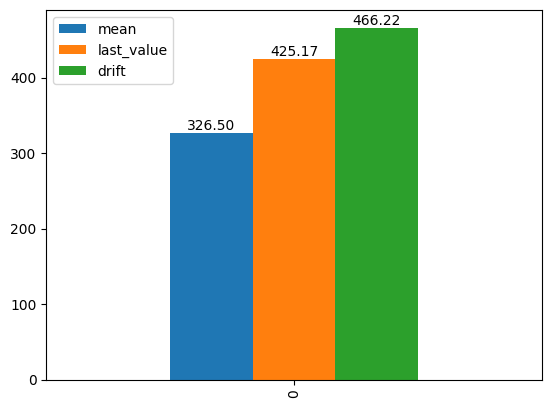

In [471]:
ax =  pd.DataFrame([loss]).plot.bar()
for index, label in enumerate(loss):   
    ax.bar_label(ax.containers[index], fmt='%.2f',  fontsize=10)

In [453]:
pd.DataFrame([loss]).melt()

,variable,value
0,mean,326.502777
1,last_value,425.172577
2,drift,466.217255


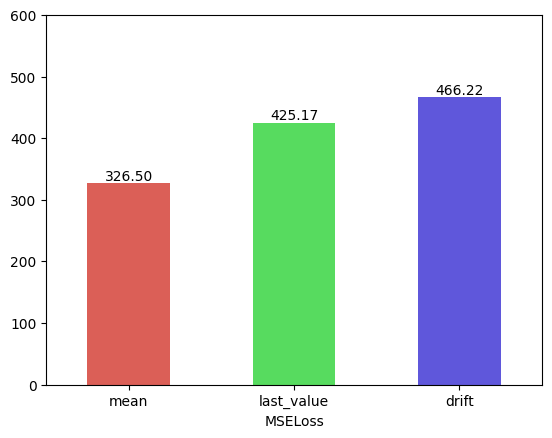

In [473]:
ax = pd.DataFrame([loss]).melt().plot.bar( x='variable', y='value', color=sns.color_palette('hls', 3) ,legend=False)
ax.bar_label(ax.containers[0], fmt='%.2f',  fontsize=10)
ax.set_ylim(0, 600)
ax.set_xlabel('MSELoss')
plt.xticks(rotation=0)
plt.show()

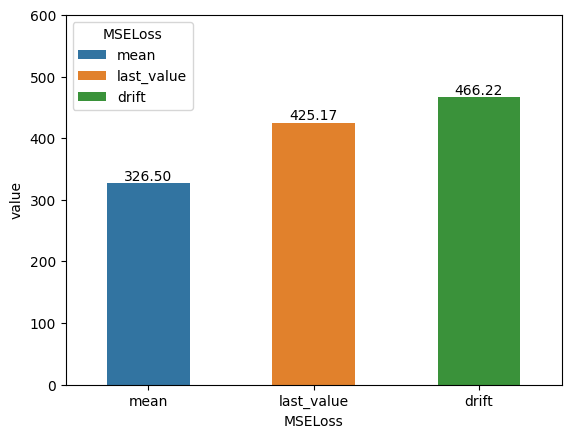

In [467]:
ax = sns.barplot(pd.DataFrame([loss]).melt(), width=0.5, x='variable', y='value', legend=True,  hue= 'variable' )
ax.set_ylim(0, 600)
ax.set_xlabel('MSELoss')
ax.legend(title='MSELoss')
for index, label in enumerate(loss):   
    ax.bar_label(ax.containers[index], fmt='%.2f',  fontsize=10)


In [476]:
df['forecast'] = df.value.shift(periods=1)

,value,forecast
0,0.000000,NaN
1,-0.138264,0.000000
2,0.509424,-0.138264
3,2.032454,0.509424
4,1.798301,2.032454
...,...,...
995,16.395408,16.676509
996,18.193095,16.395408
997,18.833938,18.193095
998,18.262759,18.833938


<Axes: >

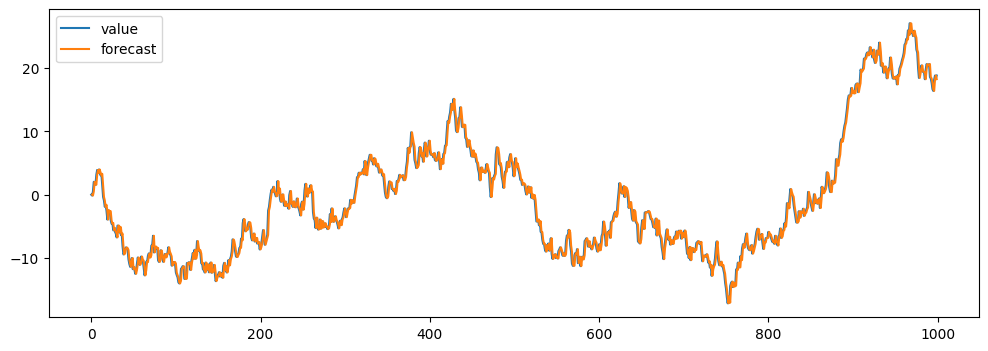

In [478]:
df.plot(figsize=(12,4))

<Axes: >

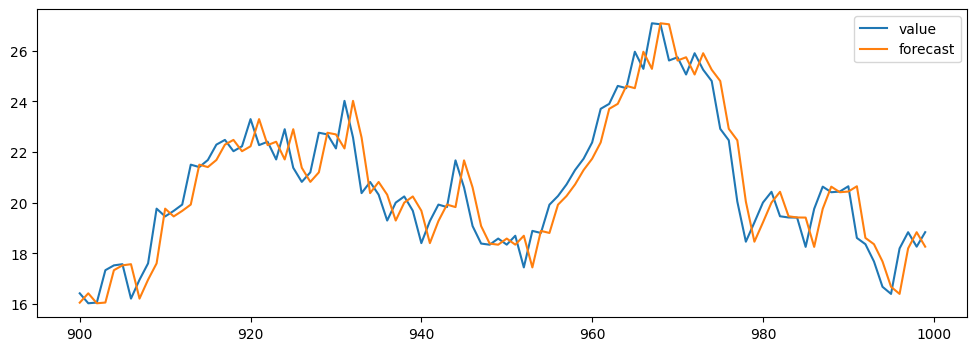

In [479]:
df[900:].plot(figsize=(12,4))